<a href="https://colab.research.google.com/github/PragyaAnanth/MLProject/blob/main/CB_SC_I5DAS18027_EvaluationLabProject_25th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **18CS383 - Lab 8 - 25th March 2021**
### **Evaluation Lab 2**
# **Classification of Code Review Questions — A Project**

**Faculty:** <br>
Dr. Sikha O K <br>
Assistant Professor(Sr.Gr) <br>
Department of Computer Science and Engineering<br>
Amrita School of Engineering Coimbatore <br>
<br>

**Student Details:** 
### **Pragya Ananth**
### **CB.SC.I5DAS18027**
Integrated M.Sc. Data Science <br>

# Mounting, Data reading, Library Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install contractions
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from contractions import contractions_dict
import re # function to expand contractions
#from openpyxl import load_workbook
import string
import nltk
import spacy
from nltk.tokenize import ToktokTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/18CSC383_ML_Lab/Lab 7 - EvalProject - 25th Mar/Clean Dataset.xlsx')
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...


In [ ]:
df.shape

(499, 5)

In [ ]:
df.isnull().sum()

inline-comment-id      0
# Comment              0
Question               0
Final Label            0
Main Question Words    0
dtype: int64

Great!

In [ ]:
df['Final Label'].unique()

array(['request for confirmation', 'surprise', 'suggestion', 'criticism',
       'hypothetical scenario', 'request for action',
       'request for clarification', 'request for information',
       'request for opinion', 'rhetorical question', 'discarded',
       'request for rationale', 'action', 'anger'], dtype=object)

# Normalisation

In [ ]:
df.loc[0:5,'Main Question Words']

0                          is this what they intended?
1    don't they really want $(TARGET_OUT_DATA_NATIV...
2    Don't we need to increment 'i' in the else cas...
3    should we just adjust the single reference in ...
4    are you sure you want to include this source f...
5                    Why not create a static library ?
Name: Main Question Words, dtype: object

In [ ]:
df['Lower Question Words']=df['Main Question Words'].map(lambda x: x.lower())

In [ ]:
#df.loc[0:5,'Main Question Words']
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...


# Apostrophe Cleanup

In [ ]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
df["Without Apostrophes"]=""
for i in range(len(df)):
  text=df.loc[i,'Lower Question Words']
  for word in text.split():
      if word in contractions:
          text=text.replace(word, contractions[word.lower()])
      df.loc[i,"Without Apostrophes"]=text

In [ ]:
df.head(10)

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...
5,50c2f81e_ac4fd6fc,6,are you sure you want to include this source f...,suggestion,Why not create a static library ?,why not create a static library ?,why not create a static library ?
6,106fa0ad_13adacaa,7,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,request for confirmation,Is this an okay way to do that?,is this an okay way to do that?,is this an okay way to do that?
7,106fa0ad_13adacaa,8,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,hypothetical scenario,Is this going to have problems with multilib?,is this going to have problems with multilib?,is this going to have problems with multilib?
8,1a6dff43_0646dc80,9,"Please add parentheses around this.\n\nAlso, c...",request for action,"Also, can you add a comment similar to what is...","also, can you add a comment similar to what is...","also, can you add a comment similar to what is..."
9,1fcb3196_598a0379,10,Here's this pattern again.\n\nIt makes me worr...,request for clarification,Is there a use-case I'm missing?,is there a use-case i'm missing?,is there a use-case i am missing?


# Removing Special Characters

In [ ]:
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s_]' 
    return re.sub(pat, '', text)
 
# call function
remove_special_characters("007 Not sure@ if this % was #fun! 558923 What do# you think** of it.? $500USD!")

'007 Not sure if this  was fun! 558923 What do you think of it.? 500USD!'

In [ ]:
df["Without SpecialChars"]=""
for i in range(len(df)):
   text=df.loc[i,"Without Apostrophes"]
   df.loc[i,"Without SpecialChars"]=remove_special_characters(text)

In [ ]:
df.head(10)

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...
5,50c2f81e_ac4fd6fc,6,are you sure you want to include this source f...,suggestion,Why not create a static library ?,why not create a static library ?,why not create a static library ?,why not create a static library ?
6,106fa0ad_13adacaa,7,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,request for confirmation,Is this an okay way to do that?,is this an okay way to do that?,is this an okay way to do that?,is this an okay way to do that?
7,106fa0ad_13adacaa,8,wangying: ADDRESS_SANITIZER_RUNTIME_LIBRARY co...,hypothetical scenario,Is this going to have problems with multilib?,is this going to have problems with multilib?,is this going to have problems with multilib?,is this going to have problems with multilib?
8,1a6dff43_0646dc80,9,"Please add parentheses around this.\n\nAlso, c...",request for action,"Also, can you add a comment similar to what is...","also, can you add a comment similar to what is...","also, can you add a comment similar to what is...","also, can you add a comment similar to what is..."
9,1fcb3196_598a0379,10,Here's this pattern again.\n\nIt makes me worr...,request for clarification,Is there a use-case I'm missing?,is there a use-case i'm missing?,is there a use-case i am missing?,is there a usecase i am missing?


# Removing numbers

In [ ]:
def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s_]' 
    return re.sub(pattern, '', text)

In [ ]:
df["Without Numbers"]=""
for i in range(len(df)):
   text=df.loc[i,"Without SpecialChars"]
   df.loc[i,"Without Numbers"]=remove_numbers(text)

In [ ]:
df.iloc[57:62,:]

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers
57,AAAAwX%2F%2F%2FV4%3D,58,How about the LAC then? If location is FFFFFFF...,request for information,Should the new test cover both lac and cid?,should the new test cover both lac and cid?,should the new test cover both lac and cid?,should the new test cover both lac and cid?,should the new test cover both lac and cid?
58,AAAAzX%2F%2F%2Bjc%3D,59,Why are you testing add() 10 times? Either tes...,criticism,Why are you testing add() 10 times?,why are you testing add() 10 times?,why are you testing add() 10 times?,why are you testing add 10 times?,why are you testing add times?
59,AAAA3n%2F%2F%2Fpo%3D,60,so you're looping until you close a single she...,request for confirmation,so you're looping until you close a single shell?,so you're looping until you close a single shell?,so you are looping until you close a single sh...,so you are looping until you close a single sh...,so you are looping until you close a single sh...
60,AAAA3n%2F%2F%2Fpo%3D,61,so you're looping until you close a single she...,request for confirmation,Is that really what you want?,is that really what you want?,is that really what you want?,is that really what you want?,is that really what you want?
61,AAAA73%2F%2F%2FjU%3D,62,is this called at all for now? I couldn't find...,request for information,is this called at all for now?,is this called at all for now?,is this called at all for now?,is this called at all for now?,is this called at all for now?


# Removing punctuation

In [ ]:
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text
    
# call function
remove_punctuation('Article: @First sentence of some, {important} article having lot of ~ punctuations. And another one;!')

'Article First sentence of some important article having lot of  punctuations And another one'

In [ ]:
df["Without Punctuations"]=""
for i in range(len(df)):
   text=df.loc[i,"Without Numbers"]
   df.loc[i,"Without Punctuations"]=remove_punctuation(text)

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers,Without Punctuations
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...,do not they really want target_out_data_native...,do not they really want targetoutdatanativetest
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment i in the else case...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...


# Stemming

In [ ]:
# function for stemming
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text
    
# call function
get_stem("we are eating and swimming this; we have been eating and swimming else; he eats and swims ; he ate and swam ")

'we are eat and swim this; we have been eat and swim else; he eat and swim ; he ate and swam'

In [ ]:
df["Stemmed"]=""
for i in range(len(df)):
    text=df.loc[i,'Without Punctuations']
    fin=get_stem(text)
    df.loc[i,'Stemmed']=fin

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers,Without Punctuations,Stemmed
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended,is thi what they intend
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...,do not they really want target_out_data_native...,do not they really want targetoutdatanativetest,do not they realli want targetoutdatanativetest
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment i in the else case...,do not we need to increment i in the els case ...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the singl refer in bioni...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to includ thi sourc file...


# Lemmatization

In [ ]:
nlp = spacy.load('en',parse=True,tag=True, entity=True)
# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
    
# call function
get_lem("we are eating and swimming ; we have been eating and swimming ; he eats and swims ; he ate and swam ")

'we be eat and swim ; we have be eat and swim ; he eat and swim ; he eat and swam'

In [ ]:
df["Lemmatised"]=""
for i in range(len(df)):
    text=df.loc[i,"Without Punctuations"]
    fin=get_lem(text)
    df.loc[i,"Lemmatised"]=fin

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers,Without Punctuations,Stemmed,Lemmatised
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended,is thi what they intend,be this what they intend
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...,do not they really want target_out_data_native...,do not they really want targetoutdatanativetest,do not they realli want targetoutdatanativetest,do not they really want targetoutdatanativetest
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment i in the else case...,do not we need to increment i in the els case ...,do not we need to increment i in the else case...
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the singl refer in bioni...,should we just adjust the single reference in ...
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to includ thi sourc file...,be you sure you want to include this source fi...


# Removing Stopwords

In [ ]:

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')

# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text
    
# call function
remove_stopwords("i am myself you the stopwords list and this article is not should removed")

'stopwords list article not removed'

In [ ]:
df["Without Stopwords"]=""
for i in range(len(df)):
    text=df.loc[i,'Lemmatised']
    fin2=remove_stopwords(text)
    df.loc[i,'Without Stopwords']=fin2

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers,Without Punctuations,Stemmed,Lemmatised,Without Stopwords
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended,is thi what they intend,be this what they intend,intend
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...,do not they really want target_out_data_native...,do not they really want targetoutdatanativetest,do not they realli want targetoutdatanativetest,do not they really want targetoutdatanativetest,not really want targetoutdatanativetest
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment i in the else case...,do not we need to increment i in the els case ...,do not we need to increment i in the else case...,not need increment else case avoid infinite loop
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the singl refer in bioni...,should we just adjust the single reference in ...,adjust single reference bionic remove
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to includ thi sourc file...,be you sure you want to include this source fi...,sure want include source file directly


# Removal of whitespaces and tabs

In [ ]:
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()
    
# call function
remove_extra_whitespace_tabs('  This web line  has \t some extra  \t   tabs and whitespaces  ')

'This web line has some extra tabs and whitespaces'

In [ ]:
df['Without Extra Spaces']=""
for i in range(len(df)):
    text=df.loc[i,"Without Stopwords"]
    fin3=remove_extra_whitespace_tabs(text)
    df.loc[i,"Without Extra Spaces"]=fin3

In [ ]:
df.head()

,inline-comment-id,# Comment,Question,Final Label,Main Question Words,Lower Question Words,Without Apostrophes,Without SpecialChars,Without Numbers,Without Punctuations,Stemmed,Lemmatised,Without Stopwords,Without Extra Spaces
0,84326dd1_566c7146,1,is this what they intended? don't they really ...,request for confirmation,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended?,is this what they intended,is thi what they intend,be this what they intend,intend,intend
1,84326dd1_566c7146,2,is this what they intended? don't they really ...,surprise,don't they really want $(TARGET_OUT_DATA_NATIV...,don't they really want $(target_out_data_nativ...,do not they really want $(target_out_data_nati...,do not they really want target_out_data_native...,do not they really want target_out_data_native...,do not they really want targetoutdatanativetest,do not they realli want targetoutdatanativetest,do not they really want targetoutdatanativetest,not really want targetoutdatanativetest,not really want targetoutdatanativetest
2,99d1f8e4_92b31cea,3,Don't we need to increment 'i' in the else cas...,suggestion,Don't we need to increment 'i' in the else cas...,don't we need to increment 'i' in the else cas...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment 'i' in the else ca...,do not we need to increment i in the else case...,do not we need to increment i in the els case ...,do not we need to increment i in the else case...,not need increment else case avoid infinite loop,not need increment else case avoid infinite loop
3,193d089f_f5fac752,4,i can't see anywhere where this is set to fals...,suggestion,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the single reference in ...,should we just adjust the singl refer in bioni...,should we just adjust the single reference in ...,adjust single reference bionic remove,adjust single reference bionic remove
4,50c2f81e_ac4fd6fc,5,are you sure you want to include this source f...,criticism,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to include this source f...,are you sure you want to includ thi sourc file...,be you sure you want to include this source fi...,sure want include source file directly,sure want include source file directly


# Visualization of most occuring words

In [ ]:


our_words = df['Without Extra Spaces'].str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(our_words)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
lis=sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
lis3=sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
lis

940


['not',
 'use',
 'need',
 'add',
 'make',
 'test',
 'would',
 'comment',
 'could',
 'file',
 'call',
 'check',
 'one',
 'maybe',
 'well',
 'code',
 'instead',
 'remove',
 'really',
 'want',
 'think',
 'like',
 'function',
 'return',
 'change',
 'set',
 'line',
 'method',
 'work',
 'static',
 'go',
 'move',
 'mean',
 'reason',
 'type',
 'case',
 'way',
 'possible',
 'get',
 'right',
 'read',
 'value',
 'also',
 'const',
 'error',
 'say',
 'new',
 'still',
 'always',
 'name']

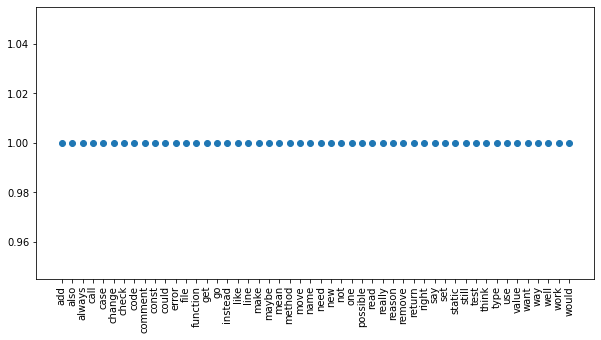

In [ ]:

x, y = np.unique(lis, return_counts=True)
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xticks(rotation=90)
plt.show()

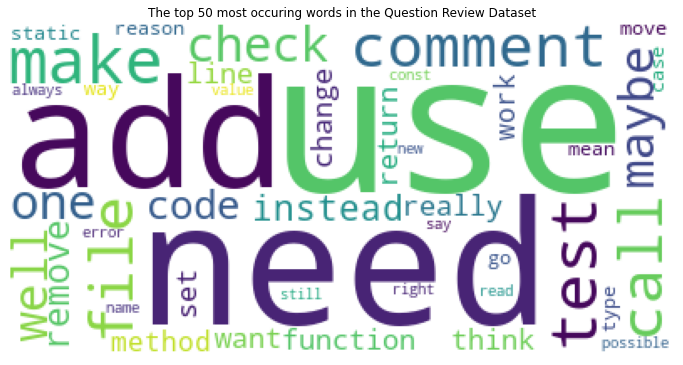

In [ ]:
#wordcloud=WordCloud().generate_from_frequencies(frequency_dist)

wordcloud = WordCloud (
                    background_color = 'white',
                    #width = 1000,
                    #height = 500
                        ).generate(' '.join(lis))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.title("The top 50 most occuring words in the Question Review Dataset")
plt.show()

#plt.figure(figsize=(10,8))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

# Data Splitting

In [ ]:
#df.loc[0,'Question']

In [ ]:
#df['Question']=df['Question'].map(lambda x: x.rstrip('\n'))

In [ ]:
#df.loc[85,'Question']

In [ ]:
#df.loc[0,'Main Question Words']

In [ ]:
#X=df[['inline-comment-id','Main Question Words','Final Label']]
#y=df[['inline-comment-id','Final Label']]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [ ]:
len(frequency_dist)

940

**Data splitting**

In [ ]:
X_train=df.loc[:399,'Without Extra Spaces'].values
y_train=df.loc[:399,'Final Label'].values
X_test=df.loc[400:,'Without Extra Spaces'].values
y_test=df.loc[400:,'Final Label'].values

# TF-IDF Classifier

**Model fitting**

In [ ]:

vectorizer=TfidfVectorizer()
train_vectors=vectorizer.fit_transform(X_train)
test_vectors=vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(400, 802) (99, 802)


In [ ]:


classy=MultinomialNB().fit(train_vectors,y_train)

In [ ]:

predicted = classy.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.36363636363636365


### Hyperparameter tuning

**Data splitting**

In [ ]:
X=df['Without Extra Spaces']
y=df['Final Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

**Model fitting**

In [ ]:
vectorizer=TfidfVectorizer()
train_vectors=vectorizer.fit_transform(X_train)
test_vectors=vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(399, 779) (100, 779)


In [ ]:

classy=MultinomialNB().fit(train_vectors,y_train)

In [ ]:

predicted = classy.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.4


# KNN

In [ ]:

label_encoder=preprocessing.LabelEncoder()
df['LabelEncoded']=label_encoder.fit_transform(df['Without Extra Spaces'])
df['LabelEncoded'].unique()

array([172, 287, 282,  16, 404, 270, 307, 148,  20, 439, 318, 165, 145,
       417,  54, 444,  26,  27,  69, 219, 217, 274, 302, 166, 199, 171,
       421, 461, 244,  31,  77, 309, 471,  10, 230, 466, 126, 448, 367,
        24, 141, 238, 475, 211, 168, 393, 296, 406, 101, 346, 304,  64,
       117,  93, 224, 192, 200, 255, 409, 202, 350,  42, 395, 343, 360,
       258, 262, 116, 187, 154, 313, 229,  39,  53, 110, 132, 190, 364,
        96, 445, 221, 299,  50, 327, 139, 278, 205, 354, 405, 356,  90,
       157, 156, 376,  75, 468,  62, 124, 383,  37, 283,  63, 163, 225,
         2, 419,  86, 440, 198,  80, 227,   4, 152,  19, 248, 339, 412,
       257, 334, 465, 105, 342, 303, 458, 330, 305, 408, 469, 189, 182,
        94, 324, 201, 118, 266,   6, 426, 158, 442, 403,  72, 213, 273,
       179, 272, 207, 335, 103, 316, 241, 115, 312, 398, 149,  28,  85,
       447,  88, 351, 264,  29, 443, 169, 385, 104, 212, 195, 336, 122,
        15, 344, 109, 125, 140, 315, 450, 340,  30, 267,  68, 11

In [ ]:
X=df['LabelEncoded']
X=np.array(X).reshape(-1,1)
y=df['Final Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [ ]:

k_range=range(1,26)
#print (type(k_range))
scores={}
scores_list=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

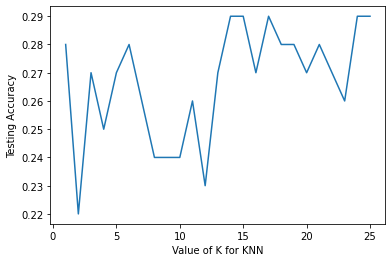

In [ ]:
#%matplotlib inline

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.64

# Logistic Regression

In [ ]:
X=df['LabelEncoded']
import numpy as np
X=np.array(X).reshape(-1,1)
y=df['Final Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)


In [ ]:

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [ ]:

classie = LogisticRegression(random_state=0)
classie.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classie.predict(X_test)

In [ ]:

cm=confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.33

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X=df.loc[:,'Without Extra Spaces']
#X=df.loc[:,:]
#y=df.iloc[:,-1]
y=df.loc[:,'Final Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
print(model)
#X_train.shape

IndexError: ignored

# Trials (this section is to be ignored)

In [ ]:
CONTRACTION_MAP = { "ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, map=CONTRACTION_MAP):
    pattern = re.compile('({})'.format('|'.join(map.keys())), flags=re.IGNORECASE|re.DOTALL)
    def get_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded = map.get(match) if map.get(match) else map.get(match.lower())
        expanded = first_char+expanded[1:]
        return expanded    
        
    new_text = pattern.sub(get_match, text)
    new_text = re.sub("'", "", new_text)
    return new_text

In [ ]:
# call function 
expand_contractions("Y’all i’d contractions you’re expanded don’t think.")

'Y’all i’d contractions you’re expanded don’t think.'

In [ ]:
text="What's the best way to ensure this?"
for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
print(text)

what is the best way to ensure this?
